# Classic Risk Premia Portfolio Backtest

In this notebook we backtest a classic long-only portfolio of ETFs.

Profits are re-invested.

Rebalancing occurs ad-hoc when the asset weights exceed the target weights by a margin greater than the 'trade buffer'.

A minimum fixed commission per trade is modelled. In this scheme trading back to the ideal target weight is recommended.

Contrast with a percentage commission scheme where trading back to the buffer limit only is considered optimal.

In [1]:
import os
import sys
import importlib
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

import ffn

%matplotlib inline

# Hack to ensure the notebook can load local modules by appending the parent directory to the system path
# Ensure a '.env' file is in the workspace root so location can be detected
from dotenv import find_dotenv
sys.path.append(os.path.dirname(find_dotenv('donotdelete.env')))

import alphasim.backtest
importlib.reload(alphasim.backtest)

from alphasim.backtest import backtest

In [2]:
price_df = pdr.get_data_yahoo(['VTI', 'TLT', 'GLD'])
price_df = price_df['Adj Close']
display(price_df)

Symbols,VTI,TLT,GLD
Date,,,
2017-10-09,120.264023,111.911880,122.080002
2017-10-10,120.548782,112.092407,122.400002
2017-10-11,120.714111,112.309059,122.790001
2017-10-12,120.567146,112.787453,122.889999
2017-10-13,120.659004,113.599876,123.820000
...,...,...,...
2022-10-03,184.029999,103.830002,158.429993
2022-10-04,189.940002,103.540001,160.699997
2022-10-05,189.580002,102.550003,159.809998


In [3]:
weight_df = price_df.copy()
weight_df[:] = [0.6, 0.3, 0.1]
display(weight_df)

Symbols,VTI,TLT,GLD
Date,,,
2017-10-09,0.6,0.3,0.1
2017-10-10,0.6,0.3,0.1
2017-10-11,0.6,0.3,0.1
2017-10-12,0.6,0.3,0.1
2017-10-13,0.6,0.3,0.1
...,...,...,...
2022-10-03,0.6,0.3,0.1
2022-10-04,0.6,0.3,0.1
2022-10-05,0.6,0.3,0.1


In [4]:
def fixed_min_commission(trade_price, trade_size):
    return 10

result = backtest(
    prices=price_df, 
    weights=weight_df, 
    trade_buffer=0.04, 
    do_limit_trade_size=False, 
    commission_func=fixed_min_commission,
    initial_capital=10000,
    do_reinvest=True)

display(result)

price  start_portfolio      exposure  current_weight  \
datetime   Symbols                                                              
2017-10-09 VTI      120.264023         0.000000      0.000000        0.000000   
           TLT      111.911880         0.000000      0.000000        0.000000   
           GLD      122.080002         0.000000      0.000000        0.000000   
           cash       1.000000     10000.000000  10000.000000        1.000000   
2017-10-10 VTI      120.548782        49.890232   6014.206719        0.601922   
...                        ...              ...           ...             ...   
2022-10-06 cash       1.000000       672.530178    672.530178        0.050090   
2022-10-07 VTI      182.785004        41.932926   7664.709952        0.581649   
           TLT      101.150002        35.032518   3543.539240        0.268907   
           GLD      158.309998         8.191350   1296.772569        0.098408   
           cash       1.000000       672.530178    672.530178        0.051036   

                    target_weight  delta_weight  do_trade  adj_target_weight  \
datetime   Symbols                                                             
2017-10-09 VTI       6.000000e-01      0.600000      True           0.600000   
           TLT       3.000000e-01      0.300000      True           0.300000   
           GLD       1.000000e-01      0.100000      True           0.100000   
           cash      1.110223e-16     -1.000000     False           1.000000   
2017-10-10 VTI       6.000000e-01     -0.001922     False           0.601922   
...                           ...           ...       ...                ...   
2022-10-06 cash      1.110223e-16     -0.050090     False           0.050090   
2022-10-07 VTI       6.000000e-01      0.018351     False           0.581649   
           TLT       3.000000e-01      0.031093     False           0.268907   
           GLD       1.000000e-01      0.001592     False           0.098408   
           cash      1.110223e-16     -0.051036     False           0.051036   

                    adj_delta_weight  trade_value  trade_size  end_portfolio  
datetime   Symbols                                                            
2017-10-09 VTI                   0.6       6000.0   49.890232      49.890232  
           TLT                   0.3       3000.0   26.806805      26.806805  
           GLD                   0.1       1000.0    8.191350       8.191350  
           cash                  0.0          0.0    0.000000     -30.000000  
2017-10-10 VTI                   0.0          0.0    0.000000      49.890232  
...                              ...          ...         ...            ...  
2022-10-06 cash                  0.0          0.0    0.000000     672.530178  
2022-10-07 VTI                   0.0          0.0    0.000000      41.932926  
           TLT                   0.0          0.0    0.000000      35.032518  
           GLD                   0.0          0.0    0.000000       8.191350  
           cash                  0.0          0.0    0.000000     672.530178  

[5036 rows x 12 columns]

In [5]:
trades_df = result.loc[result['do_trade'] == True]
display(len(trades_df))
display(trades_df)

16

price  start_portfolio     exposure  current_weight  \
datetime   Symbols                                                             
2017-10-09 VTI      120.264023         0.000000     0.000000        0.000000   
           TLT      111.911880         0.000000     0.000000        0.000000   
           GLD      122.080002         0.000000     0.000000        0.000000   
2018-08-07 VTI      137.197128        49.890232  6844.796560        0.640454   
2018-12-20 VTI      117.989204        46.738911  5514.686971        0.556830   
2020-03-09 VTI      132.790436        50.362485  6687.656336        0.542216   
           TLT      164.092392        26.806805  4398.792816        0.356641   
2020-03-23 VTI      107.296593        55.729626  5979.599018        0.559646   
2020-04-08 VTI      131.812027        59.748130  7875.522179        0.645891   
2020-06-04 TLT      151.230576        22.549374  3410.154778        0.258305   
2020-06-05 VTI      155.996841        55.502950  8658.284833        0.648383   
2021-01-05 TLT      151.548309        26.189270  3968.939623        0.259987   
2021-01-06 VTI      190.445465        51.361251  9781.517403        0.642472   
2021-03-12 VTI      202.389771        47.965874  9707.802226        0.640969   
2021-04-27 TLT      134.866852        30.219946  4075.668996        0.258788   
2022-09-12 VTI      205.776382        44.900039  9239.367512        0.642455   

                    target_weight  delta_weight  do_trade  adj_target_weight  \
datetime   Symbols                                                             
2017-10-09 VTI                0.6      0.600000      True                0.6   
           TLT                0.3      0.300000      True                0.3   
           GLD                0.1      0.100000      True                0.1   
2018-08-07 VTI                0.6     -0.040454      True                0.6   
2018-12-20 VTI                0.6      0.043170      True                0.6   
2020-03-09 VTI                0.6      0.057784      True                0.6   
           TLT                0.3     -0.056641      True                0.3   
2020-03-23 VTI                0.6      0.040354      True                0.6   
2020-04-08 VTI                0.6     -0.045891      True                0.6   
2020-06-04 TLT                0.3      0.041695      True                0.3   
2020-06-05 VTI                0.6     -0.048383      True                0.6   
2021-01-05 TLT                0.3      0.040013      True                0.3   
2021-01-06 VTI                0.6     -0.042472      True                0.6   
2021-03-12 VTI                0.6     -0.040969      True                0.6   
2021-04-27 TLT                0.3      0.041212      True                0.3   
2022-09-12 VTI                0.6     -0.042455      True                0.6   

                    adj_delta_weight  trade_value  trade_size  end_portfolio  
datetime   Symbols                                                            
2017-10-09 VTI              0.600000  6000.000000   49.890232      49.890232  
           TLT              0.300000  3000.000000   26.806805      26.806805  
           GLD              0.100000  1000.000000    8.191350       8.191350  
2018-08-07 VTI             -0.040454  -432.352137   -3.151321      46.738911  
2018-12-20 VTI              0.043170   427.542571    3.623574      50.362485  
2020-03-09 VTI              0.057784   712.705031    5.367141      55.729626  
           TLT             -0.056641  -698.612132   -4.257432      22.549374  
2020-03-23 VTI              0.040354   431.171797    4.018504      59.748130  
2020-04-08 VTI             -0.045891  -559.565884   -4.245181      55.502950  
2020-06-04 TLT              0.041695   550.463630    3.639896      26.189270  
2020-06-05 VTI             -0.048383  -646.091849   -4.141698      51.361251  
2021-01-05 TLT              0.040013   610.842121    4.030676      30.219946  
2021-01-06 VTI             -0.042472 

In [6]:
pnl_df = result['exposure'].astype('float').groupby(['datetime']).sum().to_frame()
ret_df = np.log(pnl_df/pnl_df.shift(1)).dropna()
cumret_df = ret_df.cumsum()
vola_df = ret_df.ewm(alpha=1.-0.94, adjust=False).std() * np.sqrt(252)

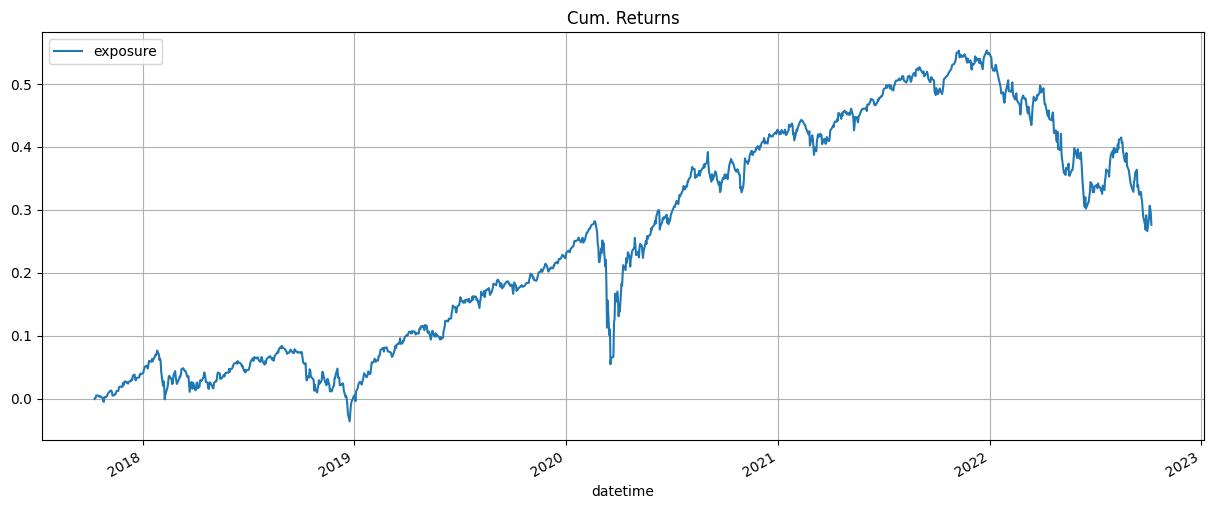

In [7]:
ax = cumret_df.plot(figsize=(15, 6))
ax.grid(True)
plt.title('Cum. Returns')
plt.legend(loc=2)
plt.show()

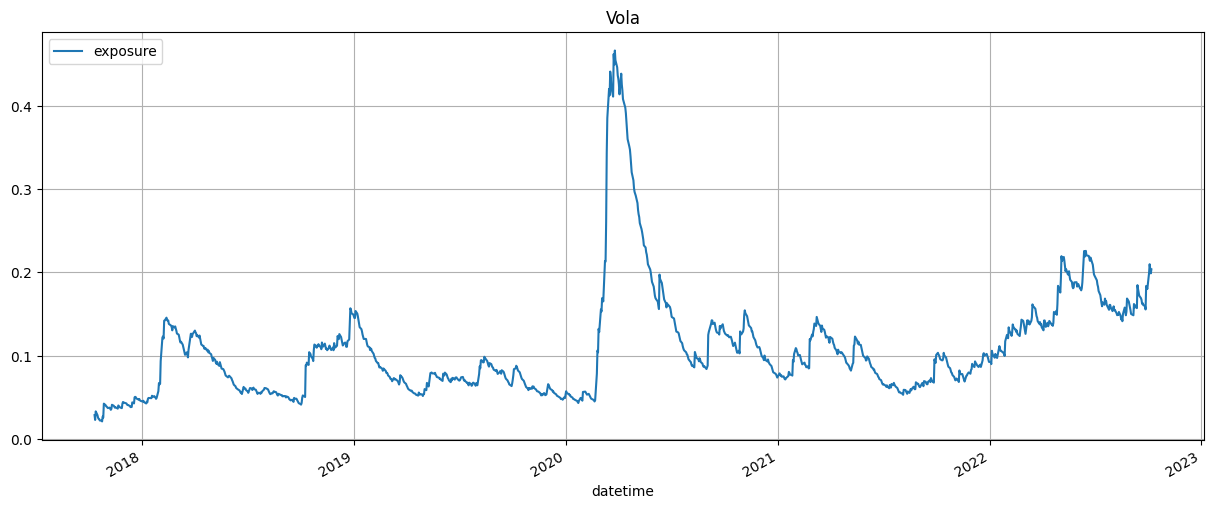

In [8]:
ax = vola_df.plot(figsize=(15, 6))
ax.grid(True)
plt.title('Vola')
plt.legend(loc=2)
plt.show()

Stat                 exposure
-------------------  ----------
Start                2017-10-09
End                  2022-10-07
Risk-free rate       0.00%

Total Return         31.78%
Daily Sharpe         0.50
Daily Sortino        0.74
CAGR                 5.68%
Max Drawdown         -24.93%
Calmar Ratio         0.23

MTD                  1.01%
3m                   -6.36%
6m                   -17.46%
YTD                  -23.83%
1Y                   -19.46%
3Y (ann.)            3.29%
5Y (ann.)            5.68%
10Y (ann.)           -
Since Incep. (ann.)  5.68%

Daily Sharpe         0.50
Daily Sortino        0.74
Daily Mean (ann.)    6.35%
Daily Vol (ann.)     12.84%
Daily Skew           -0.76
Daily Kurt           10.55
Best Day             5.52%
Worst Day            -6.25%

Monthly Sharpe       0.51
Monthly Sortino      0.85
Monthly Mean (ann.)  6.20%
Monthly Vol (ann.)   12.21%
Monthly Skew         -0.36
Monthly Kurt         0.39
Best Month           9.07%
Worst Month          -8.53%

Yea

<AxesSubplot: xlabel='datetime'>

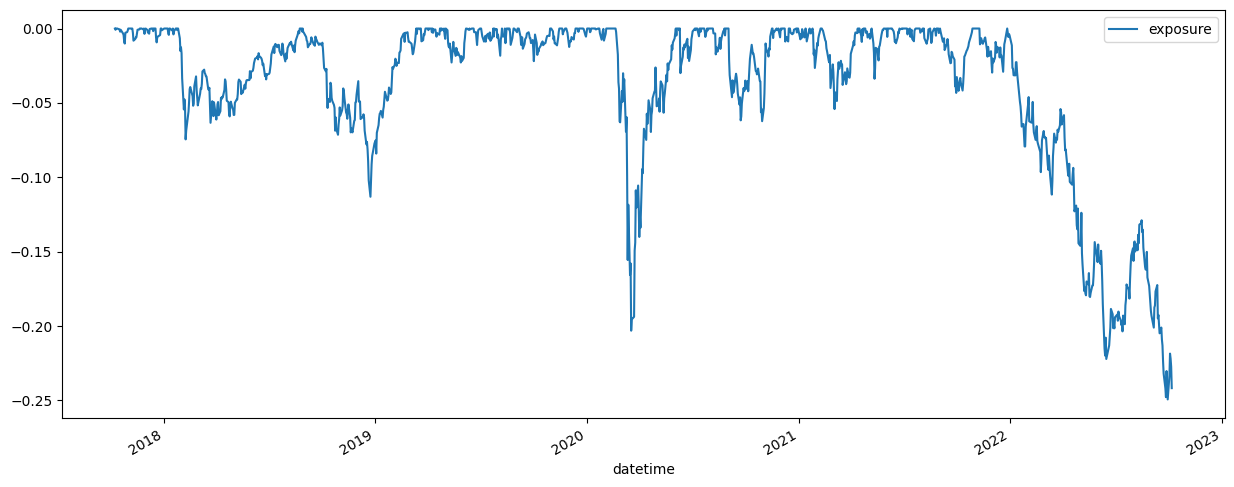

In [9]:
stats = pnl_df.calc_stats()
stats.display()
stats.prices.to_drawdown_series().plot(figsize=(15,6))